In [65]:
%matplotlib inline

In [66]:
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import pandas as pd

from scipy.stats import linregress

In [67]:
# Study data files
world_suicide_data_path = "Suicide_Data/master.csv"
continents_list_data_path = "Suicide_Data/continents.csv"

# Read the data and the study results
world_suicide_data = pd.read_csv(world_suicide_data_path)
continents_list_data = pd.read_csv(continents_list_data_path)


In [68]:
world_suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [69]:
continents_list_data.head()

,country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Aruba,South America
3,Benin,Africa
4,United States,North America


In [70]:
merged_suicide_df = pd.merge(world_suicide_data, continents_list_data, on='country', how='left')
merged_suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe


    ## Not able to do this
    

In [96]:
merged_suicide_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [97]:
merged_suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
 12  Continent           27448 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 4.2+ MB


In [103]:
# merged_suicide_df['gdp_for_year ($)'] = merged_suicide_df['gdp_for_year ($)'].astype("int64")
merged_suicide_df['GDP_for_year'] = merged_suicide_df['gdp_for_year ($)'].astype("int64")

KeyError: 'gdp_for_year ($)'

In [72]:
# Data analysis
merged_suicide_df['year'].value_counts()

2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [84]:
# year_counts = merged_suicide_df.groupby(['Continent', 'country'])['suicides_no'].agg(['sum'])
suicide_by_continent = merged_suicide_df.groupby('Continent')['suicides_no'].agg(['sum'])

suicide_by_continent.head()

,sum
Continent,
Africa,11355
Asia,2396963
Europe,2205902
North America,1340538
Oceania,84851


<ipython-input-109-805309ac9aa3>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.figure.show()


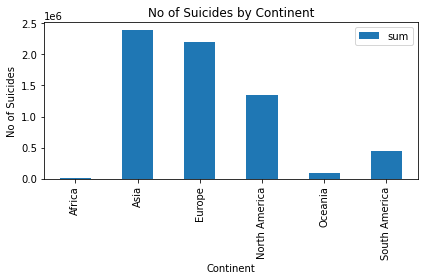

In [109]:
# continent_suicide_plot = suicide_by_continent.plot.bar(x='Continent', y='sum', rot=0)
# plt.show()

fig_suicide_continent = suicide_by_continent.plot.bar()

plt.title("No of Suicides by Continent")
plt.xlabel('Continent')
plt.ylabel('No of Suicides')
# plt.legend(label_list, loc='right', bbox_to_anchor=(1.2, 0.5));

plt.tight_layout()

plt.savefig("Images/Suicide_no_by_continent.png")

fig.figure.show()

In [86]:
suicide_per_100k_by_continent = merged_suicide_df.groupby('Continent')['suicides/100k pop'].agg(['sum'])

suicide_per_100k_by_continent.head()

,sum
Continent,
Africa,6445.61
Asia,57550.58
Europe,191306.36
North America,42987.09
Oceania,11238.10


<ipython-input-110-eae90dead644>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.figure.show()


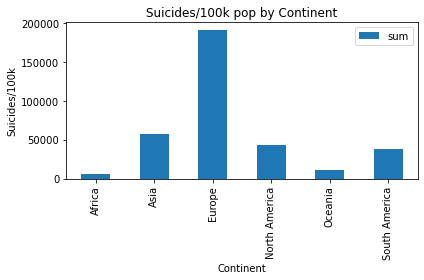

In [110]:
fig_suicide_100k_continent = suicide_per_100k_by_continent.plot.bar()

plt.title("Suicides/100k pop by Continent")
plt.xlabel('Continent')
plt.ylabel('Suicides/100k')

plt.tight_layout()

plt.savefig("Images/Suicide_per_100k_by_continent.png")

fig.figure.show()

In [115]:
# Suicides number by generation

suicide_by_generation = merged_suicide_df.groupby('generation')['suicides_no'].agg(['sum'])

suicide_by_generation.head()

,sum
generation,
Boomers,2284498
G.I. Generation,510009
Generation X,1532804
Generation Z,15906
Millenials,623459


<ipython-input-116-6846143a1705>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.figure.show()


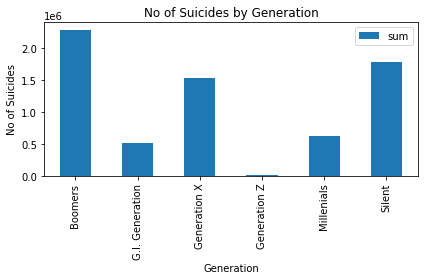

In [116]:

fig_suicide_generation = suicide_by_generation.plot.bar()

plt.title("No of Suicides by Generation")
plt.xlabel('Generation')
plt.ylabel('No of Suicides')
# plt.legend(label_list, loc='right', bbox_to_anchor=(1.2, 0.5));

plt.tight_layout()

plt.savefig("Images/Suicide_no_by_generation.png")

fig.figure.show()

In [117]:
# Suicides per 100k by generation

suicide_per_100k_by_generation = merged_suicide_df.groupby('generation')['suicides/100k pop'].agg(['sum'])

suicide_per_100k_by_generation.head()

,sum
generation,
Boomers,73563.05
G.I. Generation,65708.86
Generation X,67648.45
Generation Z,944.18
Millenials,31461.74


<ipython-input-118-f549726dce65>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.figure.show()


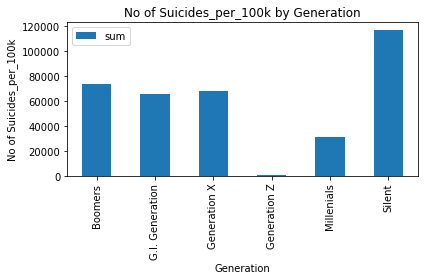

In [118]:

fig_suicide_oer_100k_generation = suicide_per_100k_by_generation.plot.bar()

plt.title("No of Suicides_per_100k by Generation")
plt.xlabel('Generation')
plt.ylabel('No of Suicides_per_100k')
# plt.legend(label_list, loc='right', bbox_to_anchor=(1.2, 0.5));

plt.tight_layout()

plt.savefig("Images/Suicide_no_per_100k_by_generation.png")

fig.figure.show()

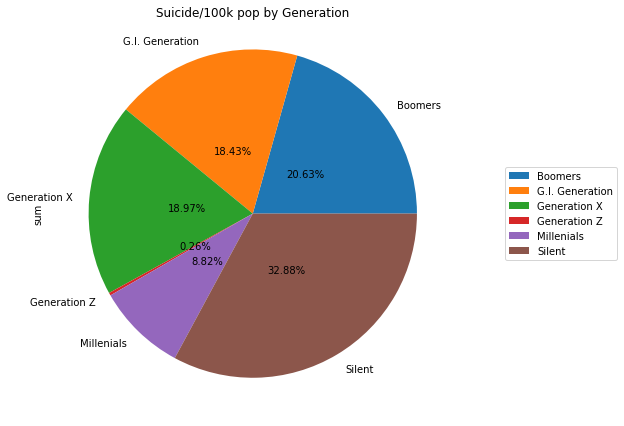

In [125]:
plot = suicide_per_100k_by_generation.plot.pie(subplots=True, figsize=(12,6),
                                                autopct='%1.2f%%', pctdistance=0.4, title="Suicide/100k pop by Generation")

plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5));

plt.tight_layout()

plt.savefig("Images/pie_suicide_per_100k_by_Generation.png")

plt.show()

In [ ]:
merged_suicide_df['Generation'].value_counts().plot(kind='pie', figsize=(10, 4),
                                       autopct='%1.2f%%', pctdistance=0.4, title="Gender Distribution")

plt.legend(loc='right', bbox_to_anchor=(1.4, 0.5));

plt.tight_layout()

plt.savefig("Images/03_pieplot_pandas.png")

plt.show()